In [3]:
#importar libs necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EXTRACT

In [4]:
# Carregar o arquivo CSV
caminho = "mental.csv"
df = pd.read_csv(caminho)

# Ver as primeiras linhas
print("Primeiras 5 linhas:")
print(df.head())

# Ver informações gerais do dataset
print("\nInformações do dataset:")
print(df.info())

Primeiras 5 linhas:
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   
3                 8.0                        1.0                       1.0   
4                 7.0                        5.0                       1.0   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Facebook            

TRANSFORM

In [5]:
# Verifica valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Verifica porcentagem de dados faltantes
print("\nPorcentagem de dados faltantes:")
print((df.isnull().sum() / len(df)) * 100)

Valores nulos por coluna:
User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

Porcentagem de dados faltantes:
User_ID                      0.0
Age                          0.0
Gender                       0.0
Daily_Screen_Time(hrs)       0.0
Sleep_Quality(1-10)          0.0
Stress_Level(1-10)           0.0
Days_Without_Social_Media    0.0
Exercise_Frequency(week)     0.0
Social_Media_Platform        0.0
Happiness_Index(1-10)        0.0
dtype: float64


In [6]:
# Faz uma cópia do dataframe original
df_clean = df.copy()

# Verifica e trata duplicatas
print(f"Duplicatas completas: {df_clean.duplicated().sum()}")

# Verifica duplicatas por User_ID
print(f"User_IDs duplicados: {df_clean['User_ID'].duplicated().sum()}")

Duplicatas completas: 0
User_IDs duplicados: 0


In [7]:
# Verifica valores únicos nas colunas categóricas
print("Valores únicos em Gender:")
print(df_clean['Gender'].value_counts())

print("\nValores únicos em Social_Media_Platform:")
print(df_clean['Social_Media_Platform'].value_counts())

Valores únicos em Gender:
Gender
Male      248
Female    229
Other      23
Name: count, dtype: int64

Valores únicos em Social_Media_Platform:
Social_Media_Platform
TikTok         95
X (Twitter)    88
LinkedIn       87
Facebook       81
YouTube        75
Instagram      74
Name: count, dtype: int64


In [8]:
# Verificar ranges das colunas numéricas
colunas_numericas = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
                    'Stress_Level(1-10)', 'Days_Without_Social_Media',
                    'Exercise_Frequency(week)', 'Happiness_Index(1-10)']

print("Ranges das colunas numéricas:")
for coluna in colunas_numericas:
    print(f"{coluna}: {df_clean[coluna].min()} - {df_clean[coluna].max()}")

Ranges das colunas numéricas:
Age: 16 - 49
Daily_Screen_Time(hrs): 1.0 - 10.8
Sleep_Quality(1-10): 2.0 - 10.0
Stress_Level(1-10): 2.0 - 10.0
Days_Without_Social_Media: 0.0 - 9.0
Exercise_Frequency(week): 0.0 - 7.0
Happiness_Index(1-10): 4.0 - 10.0


In [9]:
# Salvar o dataset limpo
df_clean.to_csv('dataset_mental_clean.csv', index=False)

print("Dataset limpo salvo com sucesso!")

Dataset limpo salvo com sucesso!


In [10]:
def resumo_limpeza(df_original, df_limpo):
    print("=== RESUMO DA LIMPEZA ===")
    print(f"Dataset original: {df_original.shape}")
    print(f"Dataset limpo: {df_limpo.shape}")
    print(f"Valores nulos removidos: {df_original.isnull().sum().sum() - df_limpo.isnull().sum().sum()}")
    print(f"Duplicatas removidas: {df_original.duplicated().sum() - df_limpo.duplicated().sum()}")

resumo_limpeza(df, df_clean)

=== RESUMO DA LIMPEZA ===
Dataset original: (500, 10)
Dataset limpo: (500, 10)
Valores nulos removidos: 0
Duplicatas removidas: 0


In [11]:
#removendo coluna inutil
df = df_clean.drop(columns=['User_ID'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Daily_Screen_Time(hrs)     500 non-null    float64
 3   Sleep_Quality(1-10)        500 non-null    float64
 4   Stress_Level(1-10)         500 non-null    float64
 5   Days_Without_Social_Media  500 non-null    float64
 6   Exercise_Frequency(week)   500 non-null    float64
 7   Social_Media_Platform      500 non-null    object 
 8   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 35.3+ KB


In [12]:
#qual correlacao importante existe?
df.corr(numeric_only=True)

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
Age,1.000000,0.023505,-0.053813,0.016522,-0.025783,0.064059,0.018513
Daily_Screen_Time(hrs),0.023505,1.000000,-0.758910,0.739891,-0.045310,-0.099023,-0.705206
Sleep_Quality(1-10),-0.053813,-0.758910,1.000000,-0.584899,0.040617,0.027431,0.678829
Stress_Level(1-10),0.016522,0.739891,-0.584899,1.000000,-0.007970,-0.018582,-0.737213
Days_Without_Social_Media,-0.025783,-0.045310,0.040617,-0.007970,1.000000,-0.000012,0.063525
Exercise_Frequency(week),0.064059,-0.099023,0.027431,-0.018582,-0.000012,1.000000,0.041224
Happiness_Index(1-10),0.018513,-0.705206,0.678829,-0.737213,0.063525,0.041224,1.000000


In [13]:
target = 'Daily_Screen_Time(hrs)'
df.corr(numeric_only=True)[target].sort_values(ascending=False)
#percebe-se que quanto maior o tempo de tela, menor o nivel de felicidade e qualidade de sono


,Daily_Screen_Time(hrs)
Daily_Screen_Time(hrs),1.000000
Stress_Level(1-10),0.739891
Age,0.023505
Days_Without_Social_Media,-0.045310
Exercise_Frequency(week),-0.099023
Happiness_Index(1-10),-0.705206
Sleep_Quality(1-10),-0.758910


In [14]:
#criando uma nova coluna Age_Group
bins = [0, 18, 25, 35, 50, 100]
labels = ["0-18", "19-25", "26-35", "36-50", "50+"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)



In [15]:
#em todos os grupos a qualidade de sono é afetado pelo tempo de tela
groups = df.groupby("Age_Group")

#percorre cada grupo
for name, group in groups:
    print(f"Correlações para a faixa {name}:")
    print(group.corr(numeric_only=True))
    print("\n")


Correlações para a faixa 0-18:
                                Age  Daily_Screen_Time(hrs)  \
Age                        1.000000                0.213827   
Daily_Screen_Time(hrs)     0.213827                1.000000   
Sleep_Quality(1-10)       -0.165844               -0.860558   
Stress_Level(1-10)         0.247025                0.860165   
Days_Without_Social_Media -0.058446               -0.078839   
Exercise_Frequency(week)   0.114960               -0.310437   
Happiness_Index(1-10)     -0.263466               -0.803588   

                           Sleep_Quality(1-10)  Stress_Level(1-10)  \
Age                                  -0.165844            0.247025   
Daily_Screen_Time(hrs)               -0.860558            0.860165   
Sleep_Quality(1-10)                   1.000000           -0.765378   
Stress_Level(1-10)                   -0.765378            1.000000   
Days_Without_Social_Media             0.218089           -0.075797   
Exercise_Frequency(week)              0.0854

/tmp/ipython-input-1651604232.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby("Age_Group")


In [16]:
# todas as faixas possuem em media o mesmo tempo de tela
df.groupby("Age_Group")["Daily_Screen_Time(hrs)"].mean()


/tmp/ipython-input-4191603254.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Daily_Screen_Time(hrs)"].mean()


,Daily_Screen_Time(hrs)
Age_Group,
0-18,5.602941
19-25,5.220619
26-35,5.758015
36-50,5.520168
50+,NaN


Load (Ruan)

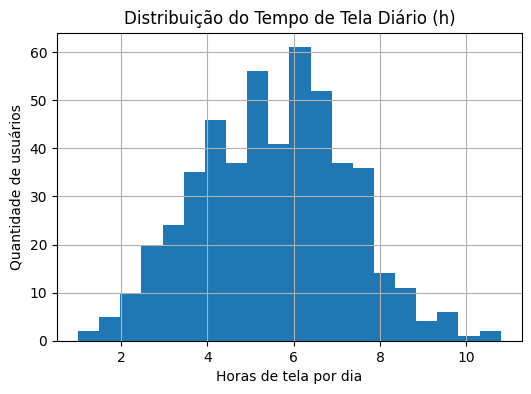

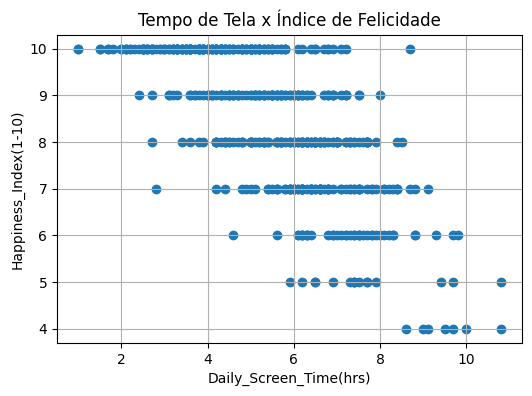

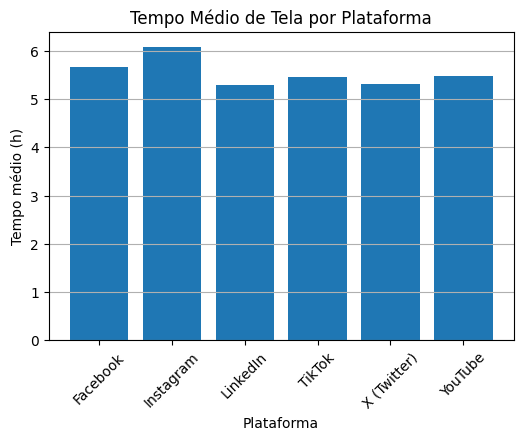

<Figure size 800x500 with 0 Axes>

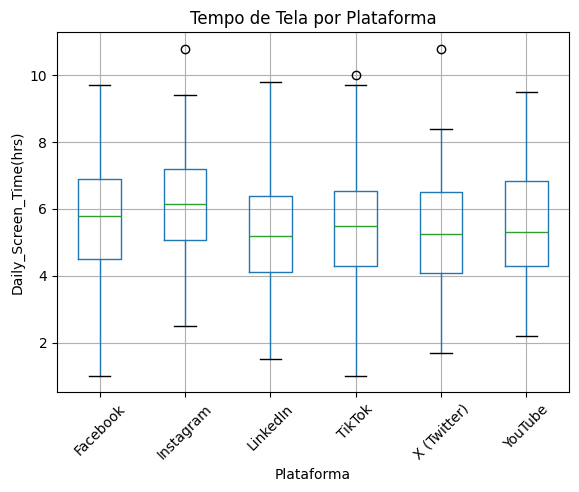

In [17]:
# LOAD – visualizações com matplotlib
import matplotlib.pyplot as plt

# 1) Distribuição do tempo de tela diário
plt.figure(figsize=(6, 4))
plt.hist(df["Daily_Screen_Time(hrs)"], bins=20)
plt.title("Distribuição do Tempo de Tela Diário (h)")
plt.xlabel("Horas de tela por dia")
plt.ylabel("Quantidade de usuários")
plt.grid(True)
plt.show()

# 2) Relação tempo de tela x índice de felicidade
plt.figure(figsize=(6, 4))
plt.scatter(df["Daily_Screen_Time(hrs)"], df["Happiness_Index(1-10)"])
plt.title("Tempo de Tela x Índice de Felicidade")
plt.xlabel("Daily_Screen_Time(hrs)")
plt.ylabel("Happiness_Index(1-10)")
plt.grid(True)
plt.show()

# 3) Média de tempo de tela por plataforma
media_tempo_plat = df.groupby("Social_Media_Platform")["Daily_Screen_Time(hrs)"].mean()

plt.figure(figsize=(6, 4))
plt.bar(media_tempo_plat.index, media_tempo_plat.values)
plt.title("Tempo Médio de Tela por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Tempo médio (h)")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

# 4) Boxplot de tempo de tela por plataforma
plt.figure(figsize=(8, 5))
df.boxplot(column="Daily_Screen_Time(hrs)", by="Social_Media_Platform")
plt.title("Tempo de Tela por Plataforma")
plt.suptitle("")  # remove título automático
plt.xlabel("Plataforma")
plt.ylabel("Daily_Screen_Time(hrs)")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()
